In [254]:
import pandas as pd
import matplotlib.pyplot as plt

In [255]:
df = pd.read_excel("./data.xlsx", index_col="exp")
df.head()

,m1,m2,m3,s1__autocorrelation__lag_8,s1__autocorrelation__lag_9,s1__autocorrelation__lag_7,s1__autocorrelation__lag_6,s1__autocorrelation__lag_5,s1__autocorrelation__lag_4,s1__longest_strike_above_mean,...,s1__ar_coefficient__coeff_3__k_10,s1__approximate_entropy__m_2__r_0.1,s1__lempel_ziv_complexity__bins_3,s1__partial_autocorrelation__lag_4,"s1__fft_coefficient__attr_""abs""__coeff_7","s1__agg_autocorrelation__f_agg_""var""__maxlag_40",s1__spkt_welch_density__coeff_2,y1,y2,y3
exp,,,,,,,,,,,,,,,,,,,,,
E001,150.223716,1176.177278,1.142097,-0.305434,-0.519191,-0.074829,0.159896,0.385790,0.590387,14,...,0.183996,0.158567,0.204152,-0.360084,0.293617,0.499488,5.886812e-08,55.460434,1.065917,114.578620
E002,102.534268,1483.654982,1.104716,-0.243785,-0.454262,-0.021002,0.202836,0.416423,0.608972,14,...,0.184370,0.144742,0.203008,-0.344364,6.142373,0.477743,3.643621e-06,50.640306,1.285666,124.651484
E003,119.890549,1254.897451,2.162773,-0.329006,-0.543405,-0.095913,0.142612,0.373002,0.582151,14,...,0.184036,0.144268,0.208163,-0.364611,26.783283,0.506435,1.590028e-04,50.832405,1.154859,57.018054
E004,162.830799,1302.043195,1.308283,-0.065152,-0.266498,0.138913,0.337187,0.521401,0.683873,16,...,0.187213,0.137326,0.193662,-0.355441,33.227591,0.460547,7.926165e-04,62.476545,1.025161,132.221218
E005,165.720956,1154.482314,1.566830,-0.304881,-0.518177,-0.074836,0.159321,0.384728,0.589003,14,...,0.183978,0.128546,0.192440,-0.357588,11.439470,0.497940,1.462831e-04,57.634438,1.043776,92.160269


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, E001 to E100
Data columns (total 50 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   m1                                                  100 non-null    float64
 1   m2                                                  100 non-null    float64
 2   m3                                                  100 non-null    float64
 3   s1__autocorrelation__lag_8                          100 non-null    float64
 4   s1__autocorrelation__lag_9                          100 non-null    float64
 5   s1__autocorrelation__lag_7                          100 non-null    float64
 6   s1__autocorrelation__lag_6                          100 non-null    float64
 7   s1__autocorrelation__lag_5                          100 non-null    float64
 8   s1__autocorrelation__lag_4                          100 non-null    float64
 9   

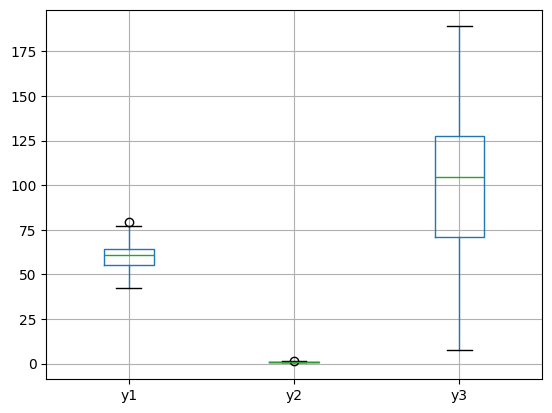

In [257]:
df.iloc[:, -3:].boxplot()
plt.show()

In [258]:
# _X = df.iloc[:, :47]
# _Y = df.iloc[:, 47:]

_X = df.iloc[:, :-3]
_Y = df.iloc[:, -3:]
print(_X.shape)
print(_Y.shape)


(100, 47)
(100, 3)


In [259]:
from sklearn.model_selection import train_test_split

_X_train, _X_test, _Y_train, _Y_test = train_test_split(
    _X, _Y, test_size=0.3, random_state=42
)

print(_X_train.shape)
print(_X_test.shape)
print(_Y_train.shape)
print(_Y_test.shape)


(70, 47)
(30, 47)
(70, 3)
(30, 3)


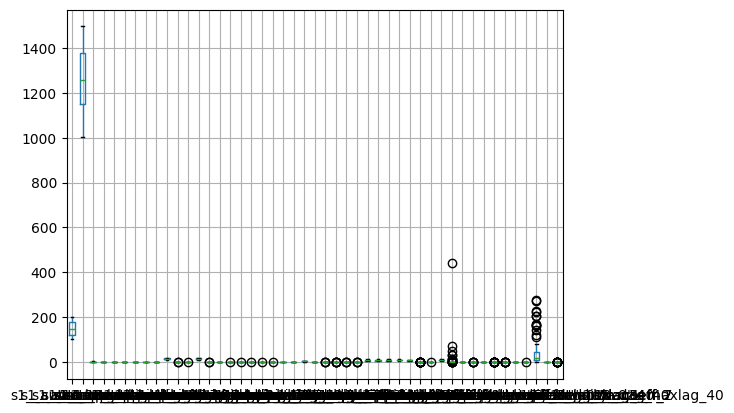

In [260]:
_X_train.boxplot()
plt.show()

In [261]:
from sklearn.preprocessing import StandardScaler

scX = StandardScaler()
scX.fit(_X_train)
X_train = scX.transform(_X_train)
X_test = scX.transform(_X_test)


# Wrong
# scX.fit(_X_train)
# X_test = scX.transform(_X_test)

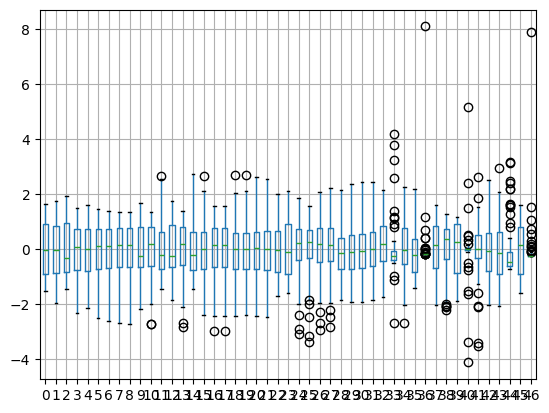

In [262]:
pd.DataFrame(X_train).boxplot()
plt.show()

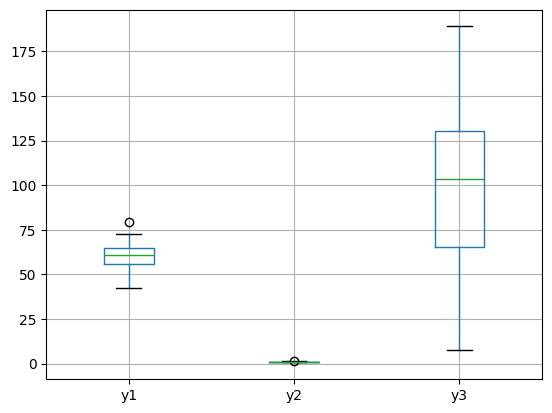

In [263]:
_Y_train.boxplot()
plt.show()

In [264]:
scY = StandardScaler()
Y_train = scY.fit_transform(_Y_train)
Y_test = scY.transform(_Y_test)

# Wrong
# Y_test = scY.fit_transform(_Y_test)

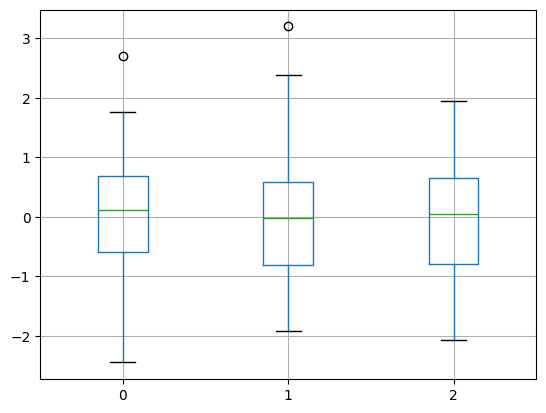

In [265]:
pd.DataFrame(Y_train).boxplot()
plt.show()

In [266]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()


In [267]:
reg.fit(X_train, Y_train)

# Wrong 1
# reg.fit(_X_train, _Y_train)

# Wrong 2
# reg.fit(_X_test, _Y_test)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [268]:
reg.coef_.shape

(3, 47)

In [269]:
reg.intercept_

array([-9.39244831e-09, -6.59407688e-09, -7.51987611e-09])

In [270]:
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

# Wrong
# reg.predict(_X_train)

In [271]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

mse_train = mean_squared_error(Y_train, Y_train_pred)
mape_train = mean_absolute_percentage_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)

print(mse_train)
print(mape_train)
print(r2_train)

0.0005823160433979564
0.04772599290067187
0.9994176839566021


In [272]:
from datetime import datetime

dt = datetime.now().strftime("%Y-%m-%d_%H-%M")
print(dt)

2025-11-27_11-46


In [273]:
data_array = []

for idx in range(3):
    mse_train = mean_squared_error(Y_train[:, idx], Y_train_pred[:, idx])
    mape_train = mean_absolute_percentage_error(Y_train[:, idx], Y_train_pred[:, idx])
    r2_train = r2_score(Y_train[:, idx], Y_train_pred[:, idx])

    mse_test = mean_squared_error(Y_test[:, idx], Y_test_pred[:, idx])
    mape_test = mean_absolute_percentage_error(Y_test[:, idx], Y_test_pred[:, idx])
    r2_test = r2_score(Y_test[:, idx], Y_test_pred[:, idx])

    data = {
        "y": idx + 1,
        "mse_train": mse_train,
        "mape_train": mape_train,
        "r2_train": r2_train,
        "mse_test": mse_test,
        "mape_test": mape_test,
        "r2_test": r2_test,
    }

    data_array.append(data)
    # print(mse)
    # print(mape)
    # print(r2)


mse_train = mean_squared_error(Y_train, Y_train_pred)
mape_train = mean_absolute_percentage_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)

mse_test = mean_squared_error(Y_test, Y_test_pred)
mape_test = mean_absolute_percentage_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

data = {
    "y": "ALL",
    "mse_train": mse_train,
    "mape_train": mape_train,
    "r2_train": r2_train,
    "mse_test": mse_test,
    "mape_test": mape_test,
    "r2_test": r2_test,
}

data_array.append(data)


df_res = pd.DataFrame.from_dict(data_array)
df_res.to_excel(f"output_{dt}.xlsx")

In [274]:
_Y_train_pred = scY.inverse_transform(Y_train_pred)

In [275]:
_mse = mean_squared_error(_Y_train, _Y_train_pred)
_mape = mean_absolute_percentage_error(_Y_train, _Y_train_pred)
_r2 = r2_score(_Y_train, _Y_train_pred)
print(_mse)
print(_mape)
print(_r2)

4.841412518989936e-05
0.002192831773960597
0.9994176839566021


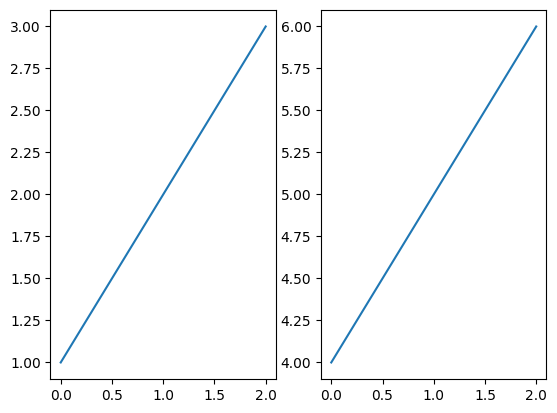

In [276]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)

axes[0].plot([1,2,3])
axes[1].plot([4,5,6])
plt.show()

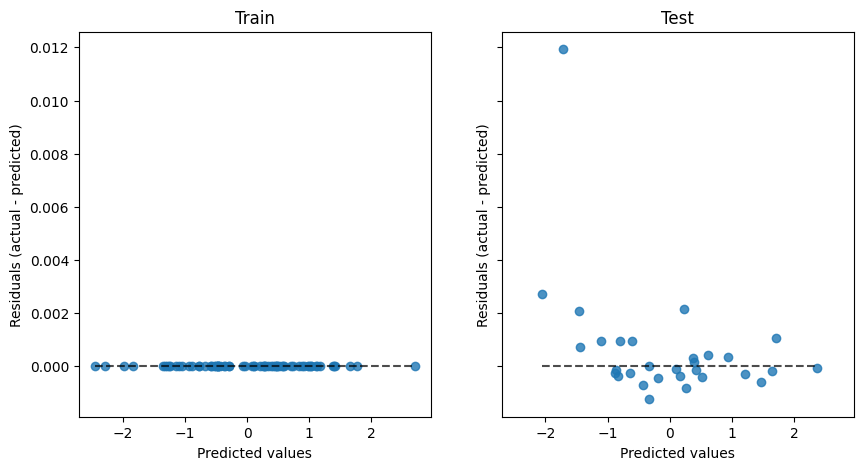

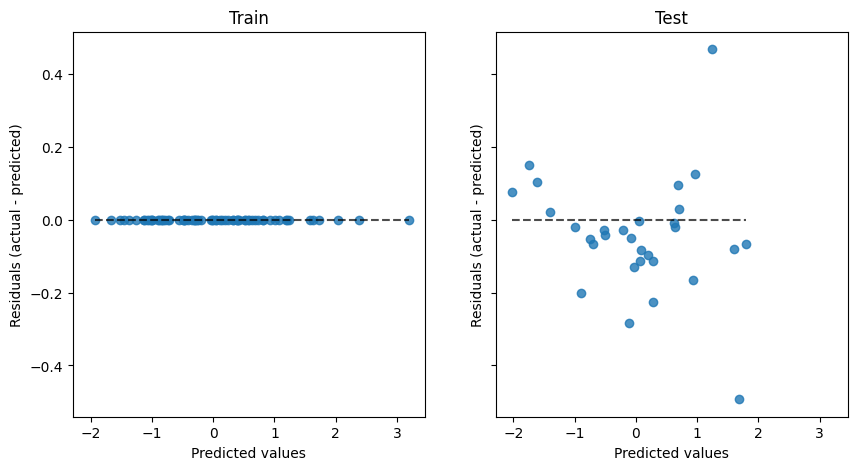

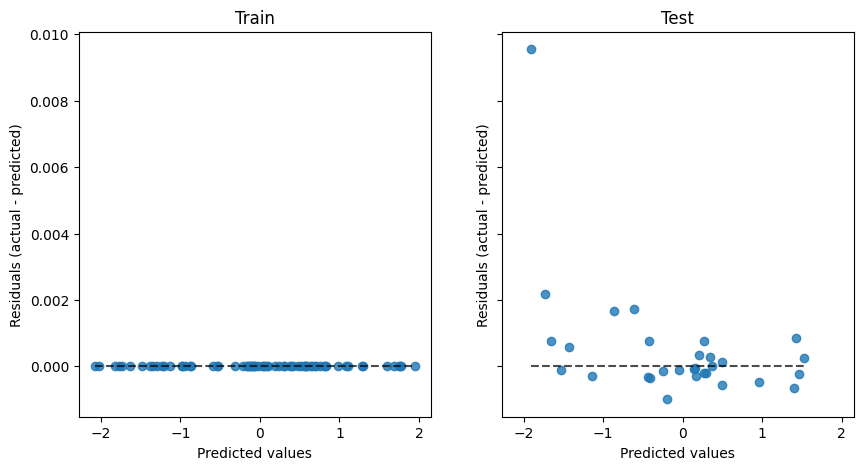

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt


for idx in range(3):
    fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True)
    
    display_train = PredictionErrorDisplay(y_true=Y_train[:, idx], y_pred=Y_train[:, idx])
    display_train.plot(ax=axes[0])
    axes[0].set_title("Train")

    display_test = PredictionErrorDisplay(y_true=Y_test[:, idx], y_pred=Y_test_pred[:, idx])
    display_test.plot(ax=axes[1])
    axes[1].set_title("Test")
    fig.tight_layout()

    fig.savefig(f"{dt}_res_{idx}.png", dpi=300, bbox_inches=None)


plt.show()